<a href="https://colab.research.google.com/github/MuhammadBayuNugroho/analisis-sentimen-artikel/blob/main/Baru_of_03_FIKS_EDA_Dataset_Awal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPLORATORY DATA ANALYSIS

Proses eksplor potensi dataset yang digunakan

## Import Library yang digunakan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
# Load the dataset provided by the user
file_path = '/content/drive/MyDrive/Dataset Analisis Sentimen/Baru - Revised Pelabelan Dataset.csv'
dataset = pd.read_csv(file_path)

# Display basic information about the dataset
dataset_info = dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Video ID           1727 non-null   object
 1   Author             1727 non-null   object
 2   Comment            1727 non-null   object
 3   Published At       1727 non-null   object
 4   Sentiment          1727 non-null   object
 5   Revised_Sentiment  1727 non-null   object
dtypes: object(6)
memory usage: 81.1+ KB


In [ ]:
dataset.head(10)

,Video ID,Author,Comment,Published At,Sentiment,Revised_Sentiment
0,R55pRFBDyAI,@nikitaCalista,baterai mahal mending beli,2024-11-04T12:45:25Z,negative,negative
1,R55pRFBDyAI,@netizenjulid9591,subsidi mobil listrik orng kaya guys klau emis...,2024-09-17T18:46:59Z,neutral,neutral
2,R55pRFBDyAI,@mintopar4868,menghemat listrik mobil pakai panel sorya solo...,2023-10-10T11:36:00Z,positive,positive
3,R55pRFBDyAI,@biarbisa2629,mudahan ciptakan mesinnya terbatas listriknya,2023-06-21T06:00:23Z,negative,negative
4,R55pRFBDyAI,@pokemonstuff3269,regulasi safetynya gak dibahas parkir garasi r...,2023-03-07T05:42:02Z,positive,positive
5,R55pRFBDyAI,@anasarrow3708,dimengerti pemerintah menukar mosin dg molis h...,2023-02-25T14:24:57Z,positive,negative
6,R55pRFBDyAI,@zulhamidi7388,susahnya perjalanan mobil listrik cocok ditera...,2022-12-29T19:56:18Z,positive,positive
7,R55pRFBDyAI,@ayatostore5140,fikirin solusi dasar bahan bakarnya emg listri...,2022-12-07T15:02:14Z,negative,negative
8,R55pRFBDyAI,@hamidi7284,mobil listerik mahal ketimbang mobil bbm jawab...,2022-12-05T09:19:30Z,negative,negative
9,R55pRFBDyAI,@srihastuti8636,darimana mobil listrik ramah lingkungankalo mo...,2022-11-14T02:09:59Z,positive,positive


## Analisis Distribusi Sentimen

<ipython-input-12-55e39b5b2d95>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Revised_Sentiment", data=dataset, palette="coolwarm", order=dataset["Revised_Sentiment"].value_counts().index)


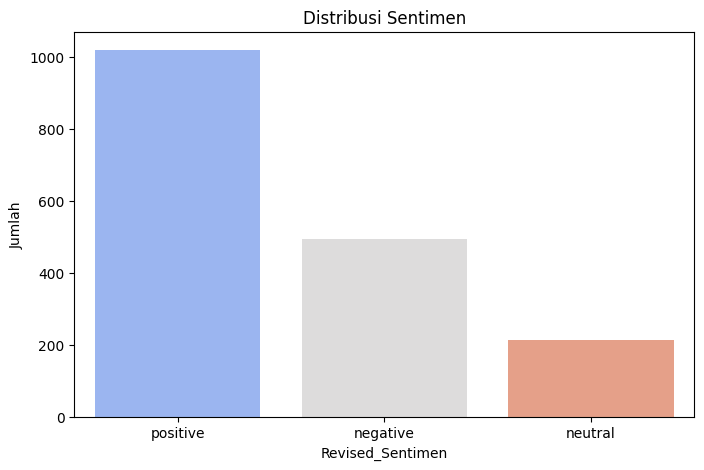

,count
Revised_Sentiment,
positive,1020
negative,493
neutral,214


In [ ]:
# Analisis Distribusi Sentimen
sentiment_counts = dataset['Revised_Sentiment'].value_counts()

# Visualisasikan Distribusi
plt.figure(figsize=(8, 5))
sns.countplot(x="Revised_Sentiment", data=dataset, palette="coolwarm", order=dataset["Revised_Sentiment"].value_counts().index)
plt.title("Distribusi Sentimen")
plt.xlabel("Revised_Sentimen")
plt.ylabel("Jumlah")
plt.show()

sentiment_counts

## Analisis Panjang Komentar Per Sentimen

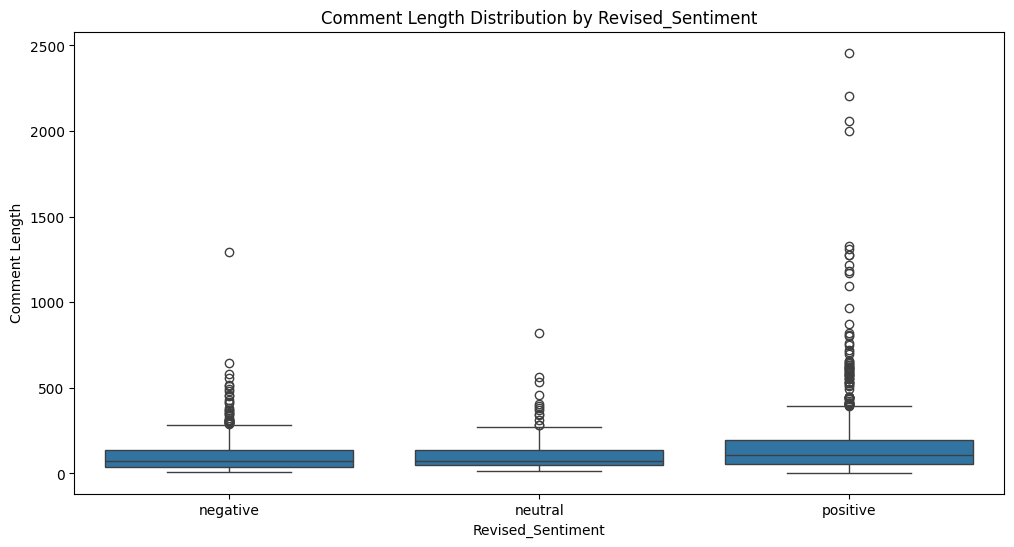

In [ ]:
# Analisis Panjang Komentar per Sentimen

# Tambahkan kolom comment length
dataset['Comment Length'] = dataset['Comment'].astype(str).apply(len)

# Visualisasi panjang komentar berdasarkan sentimen
plt.figure(figsize=(12, 6))
sns.boxplot(x='Revised_Sentiment', y='Comment Length', data=dataset)
plt.title('Comment Length Distribution by Revised_Sentiment')
plt.xlabel('Revised_Sentiment')
plt.ylabel('Comment Length')
plt.show()

## Analisis Frekuensi Kata dan Word Cloud berdasarkan Sentimen

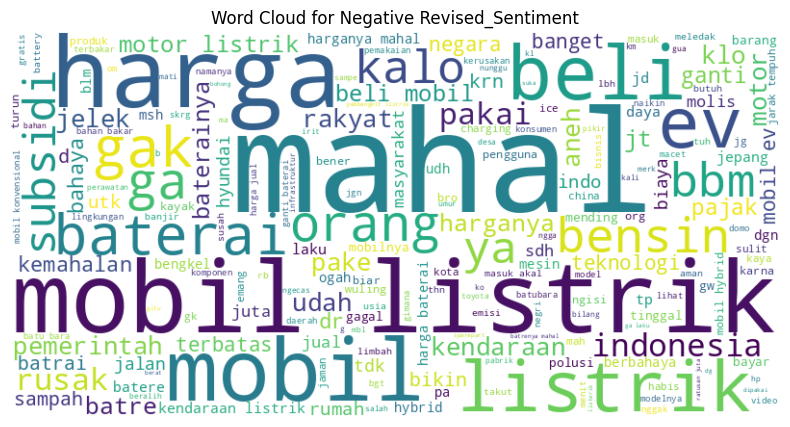

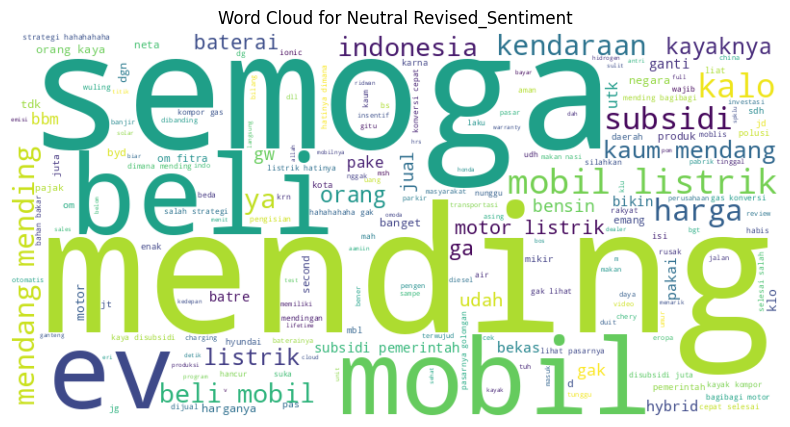

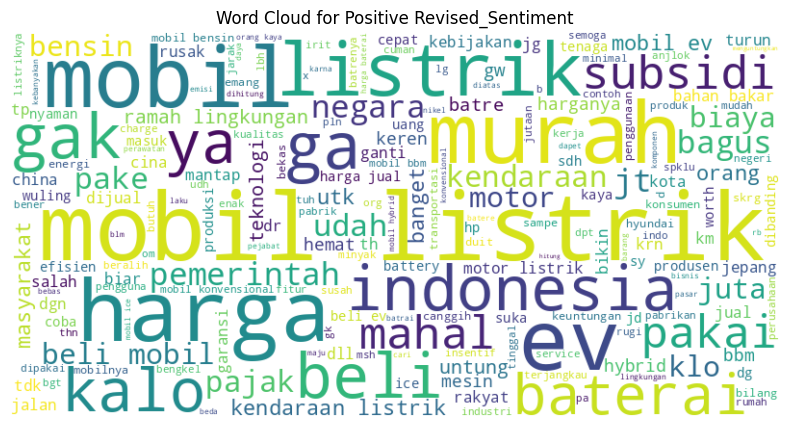

In [ ]:
# Analisis Frekuensi Kata dan Word Cloud berdasarkan Sentimen

# Tokenisasi kata-kata dalam komentar
dataset['Tokenized Words'] = dataset['Comment'].astype(str).apply(lambda x: x.split() if x != 'nan' else [])

# Gabungkan semua kata untuk setiap sentimen
sentiment_words = dataset.groupby('Revised_Sentiment')['Tokenized Words'].sum()

# Hasilkan word cloud untuk setiap sentimen
for sentiment, words in sentiment_words.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Revised_Sentiment')
    plt.axis('off')
    plt.show()

## Analisis Panjang Kata Rata-Rata

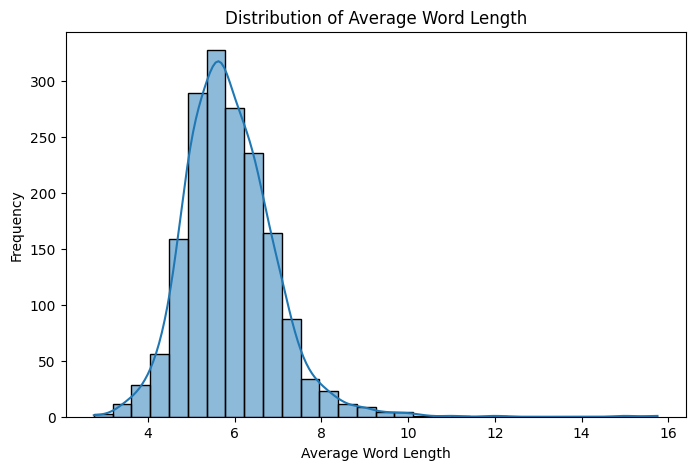

In [ ]:
# Analisis Panjang Kata
# Hitung panjang kata rata-rata per komentar
dataset['Average Word Length'] = dataset['Comment'].astype(str).apply(
    lambda x: sum(len(word) for word in x.split()) / len(x.split()) if len(x.split()) > 0 else 0)

# Visualisasikan distribusi panjang kata rata-rata
plt.figure(figsize=(8, 5))
sns.histplot(dataset['Average Word Length'], bins=30, kde=True)
plt.title('Distribution of Average Word Length')
plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Panjang kata maksimal yang ada
# Ubah 'Cleaned Comment' menjadi string sebelum menerapkan pemisahan
max_word_length = dataset['Comment'].astype(str).apply(lambda x: len(max(x.split(), key=len, default='')) if x != 'nan' else 0).max()

# Rata-rata panjang kata
# Ubah 'Cleaned Comment' menjadi string sebelum menerapkan pemisahan
average_word_length = dataset['Comment'].astype(str).apply(
    lambda x: sum(len(word) for word in x.split()) / len(x.split()) if len(x.split()) > 0 and x != 'nan' else 0
).mean()

print('Panjang maksimal yang ada:', max_word_length)
print('Rata-rata panjang kata:', average_word_length)

Panjang maksimal yang ada: 44
Rata-rata panjang kata: 5.883090357593278


## Analisis Komentar Unik vs. Redundansi

In [ ]:

# Hitung komentar unik dan berlebihan
unique_comments = dataset['Comment'].nunique()
total_comments = len(dataset)
redundant_comments = total_comments - unique_comments

# Menghapus redundant
dataset = dataset.drop_duplicates(subset='Comment')

# Tampilkan Hasilnya
unique_redundancy_analysis = {
    "Total Comments": total_comments,
    "Unique Comments": unique_comments,
    "Redundant Comments": redundant_comments,
    "Redundancy Percentage": (redundant_comments / total_comments) * 100,
}

print("Analysis of Unique vs. Redundant Comments:")
for key, value in unique_redundancy_analysis.items():
    print(f"{key}: {value}")

Analysis of Unique vs. Redundant Comments:
Total Comments: 1711
Unique Comments: 1711
Redundant Comments: 0
Redundancy Percentage: 0.0


Analisis Unik vs. Redundansi:

Total komentar: 1727
Komentar unik: 1711
Komentar duplikat: 0 (tidak ada redundansi)
Persentase redundansi: 0%

Jadi sisa data saat ini adalah 1711 baris


# EDA Lanjutan

In [ ]:
# Install dan import library yang dibutuhkan
!pip install wordcloud
!pip install nltk
!pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Download stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Tampilkan informasi dataset
dataset.head()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1711 entries, 0 to 1726
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   Video ID             1711 non-null   object             
 1   Author               1711 non-null   object             
 2   Comment              1711 non-null   object             
 3   Published At         1711 non-null   datetime64[ns, UTC]
 4   Sentiment            1711 non-null   object             
 5   Revised_Sentiment    1711 non-null   object             
 6   Comment Length       1711 non-null   int64              
 7   Tokenized Words      1711 non-null   object             
 8   Average Word Length  1711 non-null   float64            
 9   clean_comment        1711 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(7)
memory usage: 147.0+ KB


<ipython-input-45-e6e5d2b30f78>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Revised_Sentiment", data=dataset, palette="coolwarm", order=dataset["Revised_Sentiment"].value_counts().index)


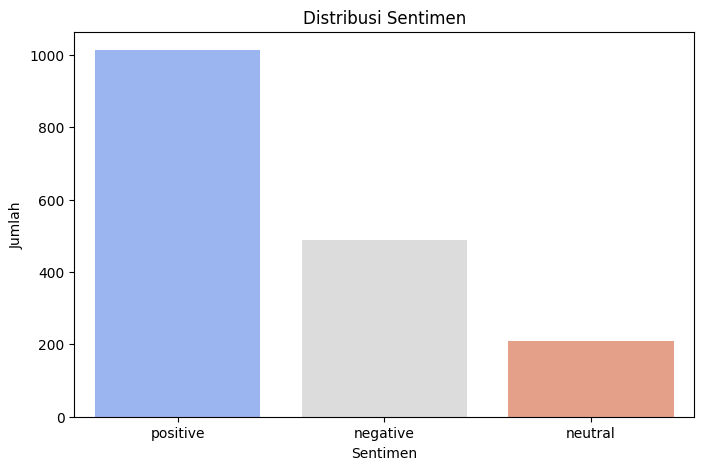

,count
Revised_Sentiment,
positive,1013
negative,488
neutral,210


In [ ]:
# ================== [ 4. DISTRIBUSI SENTIMEN ] ==================
plt.figure(figsize=(8, 5))
sns.countplot(x="Revised_Sentiment", data=dataset, palette="coolwarm", order=dataset["Revised_Sentiment"].value_counts().index)
plt.title("Distribusi Sentimen")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah")
plt.show()

# Jumlah masing-masing sentimen
dataset["Revised_Sentiment"].value_counts()

In [ ]:
# ================== [ 5. PREPROCESSING TEKS ] ==================
stop_words = set(stopwords.words("indonesian"))

def clean_text(text):
    text = str(text).lower()  # Ubah ke huruf kecil
    text = re.sub(r'http\S+', '', text)  # Hapus URL
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Hapus angka & simbol
    text = word_tokenize(text)  # Tokenisasi
    text = [word for word in text if word not in stop_words]  # Hapus stopwords
    return " ".join(text)

dataset.head(10)

,Video ID,Author,Comment,Published At,Sentiment,Revised_Sentiment,Comment Length,Tokenized Words,Average Word Length,clean_comment
0,R55pRFBDyAI,@nikitaCalista,baterai mahal mending beli,2024-11-04 12:45:25+00:00,negative,negative,26,"[baterai, mahal, mending, beli]",5.750000,baterai mahal mending beli
1,R55pRFBDyAI,@netizenjulid9591,subsidi mobil listrik orng kaya guys klau emis...,2024-09-17 18:46:59+00:00,neutral,neutral,102,"[subsidi, mobil, listrik, orng, kaya, guys, kl...",4.722222,subsidi mobil listrik orng kaya guys klau emis...
2,R55pRFBDyAI,@mintopar4868,menghemat listrik mobil pakai panel sorya solo...,2023-10-10 11:36:00+00:00,positive,positive,51,"[menghemat, listrik, mobil, pakai, panel, sory...",6.428571,menghemat listrik mobil pakai panel sorya solo...
3,R55pRFBDyAI,@biarbisa2629,mudahan ciptakan mesinnya terbatas listriknya,2023-06-21 06:00:23+00:00,negative,negative,45,"[mudahan, ciptakan, mesinnya, terbatas, listri...",8.200000,mudahan ciptakan mesinnya terbatas listriknya
4,R55pRFBDyAI,@pokemonstuff3269,regulasi safetynya gak dibahas parkir garasi r...,2023-03-07 05:42:02+00:00,positive,positive,411,"[regulasi, safetynya, gak, dibahas, parkir, ga...",7.408163,regulasi safetynya gak dibahas parkir garasi r...
5,R55pRFBDyAI,@anasarrow3708,dimengerti pemerintah menukar mosin dg molis h...,2023-02-25 14:24:57+00:00,positive,negative,241,"[dimengerti, pemerintah, menukar, mosin, dg, m...",6.562500,dimengerti pemerintah menukar mosin dg molis h...
6,R55pRFBDyAI,@zulhamidi7388,susahnya perjalanan mobil listrik cocok ditera...,2022-12-29 19:56:18+00:00,positive,positive,110,"[susahnya, perjalanan, mobil, listrik, cocok, ...",8.250000,susahnya perjalanan mobil listrik cocok ditera...
7,R55pRFBDyAI,@ayatostore5140,fikirin solusi dasar bahan bakarnya emg listri...,2022-12-07 15:02:14+00:00,negative,negative,222,"[fikirin, solusi, dasar, bahan, bakarnya, emg,...",5.371429,fikirin solusi dasar bahan bakarnya emg listri...
8,R55pRFBDyAI,@hamidi7284,mobil listerik mahal ketimbang mobil bbm jawab...,2022-12-05 09:19:30+00:00,negative,negative,293,"[mobil, listerik, mahal, ketimbang, mobil, bbm...",6.945946,mobil listerik mahal ketimbang mobil bbm jawab...
9,R55pRFBDyAI,@srihastuti8636,darimana mobil listrik ramah lingkungankalo mo...,2022-11-14 02:09:59+00:00,positive,positive,350,"[darimana, mobil, listrik, ramah, lingkunganka...",6.800000,darimana mobil listrik ramah lingkungankalo mo...


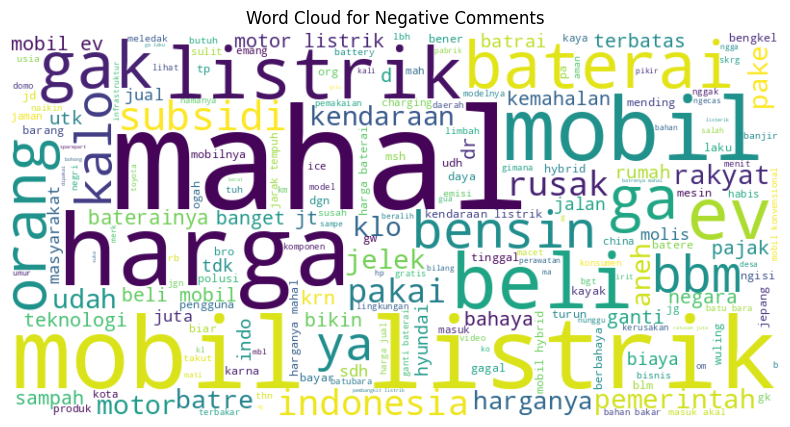

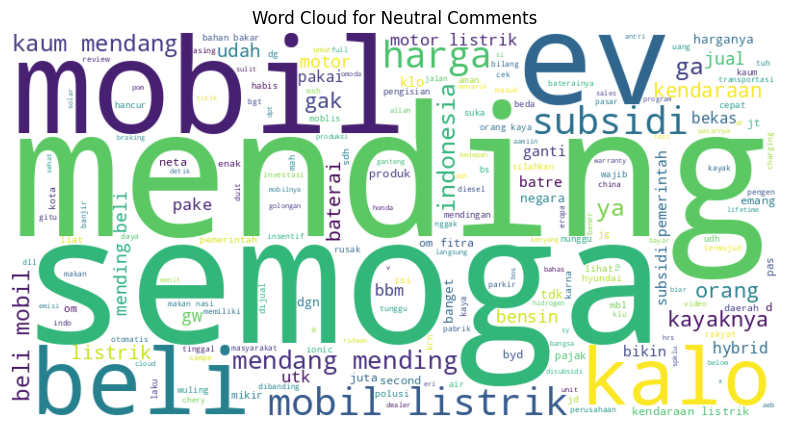

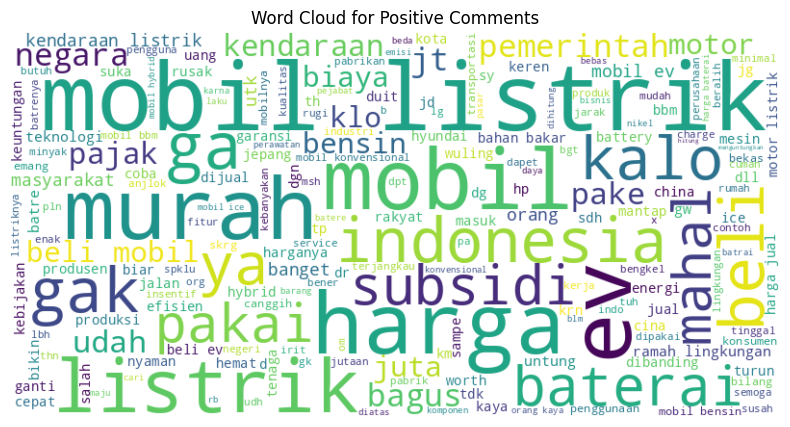

In [ ]:
# ================== [ 6. WORDCLOUD (Kata yang Paling Sering Muncul) ] ==================

# Fungsi untuk membuat wordcloud berdasarkan sentimen
def create_wordcloud_by_sentiment(df, sentiment):
    # Filter dataframe berdasarkan sentimen
    sentiment_df = df[df['Revised_Sentiment'] == sentiment]

    # Gabungkan semua komentar untuk sentimen tertentu
    text = ' '.join(sentiment_df['clean_comment'].astype(str))

    # Buat wordcloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Tampilkan wordcloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Comments')
    plt.axis('off')
    plt.show()


# Buat wordcloud untuk setiap sentimen
sentiments = dataset['Revised_Sentiment'].unique()
for sentiment in sentiments:
    create_wordcloud_by_sentiment(dataset, sentiment)

<ipython-input-55-753ac0a556d4>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dataset.resample("M", on="Published At").size().plot()


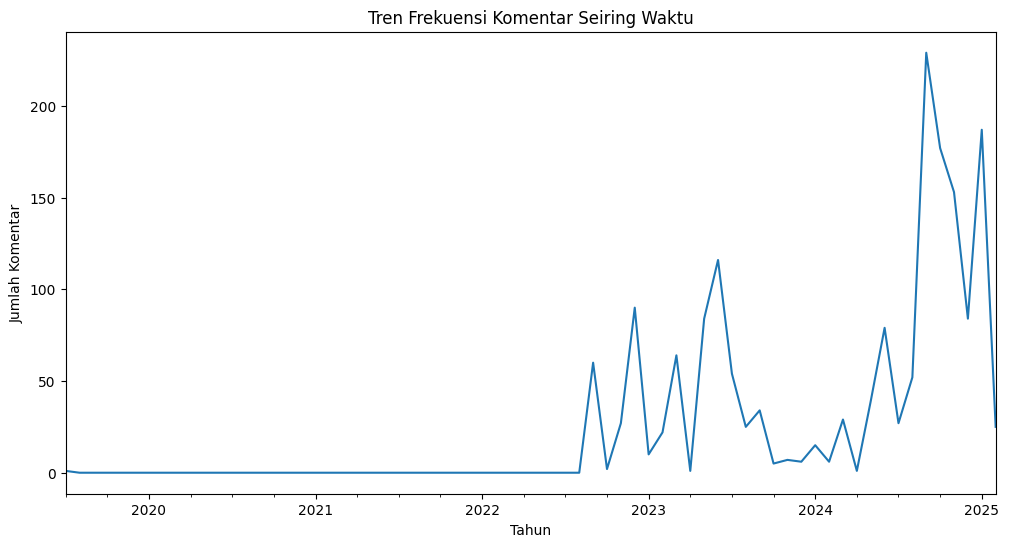

In [ ]:
# ================== [ 7. TREND KOMENTAR BERDASARKAN WAKTU ] ==================
plt.figure(figsize=(12, 6))
dataset.resample("M", on="Published At").size().plot()
plt.title("Tren Frekuensi Komentar Seiring Waktu")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Komentar")
plt.show()

<ipython-input-56-e30df89b8bfb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors.values, y=top_authors.index, palette="viridis")


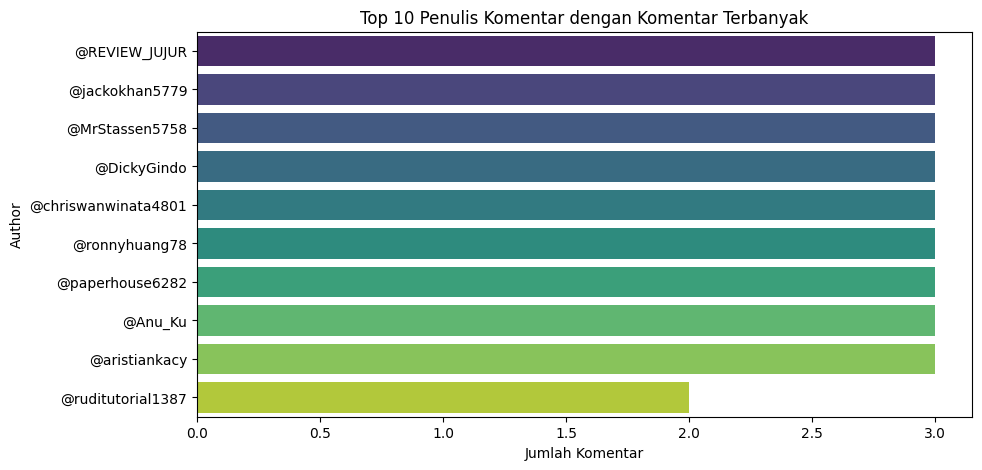

In [ ]:
# ================== [ 8. TOP 10 PENULIS KOMENTAR ] ==================
top_authors = dataset["Author"].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_authors.values, y=top_authors.index, palette="viridis")
plt.title("Top 10 Penulis Komentar dengan Komentar Terbanyak")
plt.xlabel("Jumlah Komentar")
plt.ylabel("Author")
plt.show()

In [ ]:
# ================== [ 9. TOP KOMENTAR POSITIF DAN NEGATIF ] ==================
top_positive = dataset[dataset["Revised_Sentiment"] == "positive"].sort_values(by="Published At", ascending=False).head(5)
top_negative = dataset[dataset["Revised_Sentiment"] == "negative"].sort_values(by="Published At", ascending=False).head(5)
top_neutral = dataset[dataset["Revised_Sentiment"] == "neutral"].sort_values(by="Published At", ascending=False).head(5)

print("\n🔹 **Top 5 Komentar Positif** 🔹")
print(top_positive[["Author" , "clean_comment"]])

print("\n🔻 **Top 5 Komentar Negatif** 🔻")
print(top_negative[["Author", "clean_comment"]])

print("\n🔸 **Top 5 Komentar Netral** 🔸")
print(top_neutral[["Author", "clean_comment"]])


🔹 **Top 5 Komentar Positif** 🔹
                       Author  \
779          @deddyarifin7637   
416        @theslasherout2233   
417     @andreasdharmawan6353   
1008  @pejuangkemerdekaan7777   
83            @rizkywicaq9637   

                                          clean_comment  
779   harga listrik murah bensin hukum ekonomi listr...  
416   mode fresh mode indonesia jarang udaranya bers...  
417   pengguna wuling cloud ev kalo pake ber yaa sus...  
1008  intinya sadar kaum mendang mending fomo beli e...  
83                                      worth it banget  

🔻 **Top 5 Komentar Negatif** 🔻
                         Author  \
780               @igbutama2954   
1009           @pluviophile1189   
782   @afiluxinmacfidmacfid2328   
1426        @henriardyanzah9212   
783            @henrypetrosa663   

                                          clean_comment  
780       mahal listrikny kalo bnyak pake mobil listrik  
1009                          pemakaian mobil ev sampah  
782 

In [ ]:
# simpan dataset hasil EDA
dataset.to_csv('Baru - dataset_hasil_EDA_awal.csv', index=False)